In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [62]:
trainset = datasets.MNIST(root='./data', train=True, download=False, transform = transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=False, transform = transforms.ToTensor())

In [63]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

In [64]:
images, labels = next(iter(trainloader))

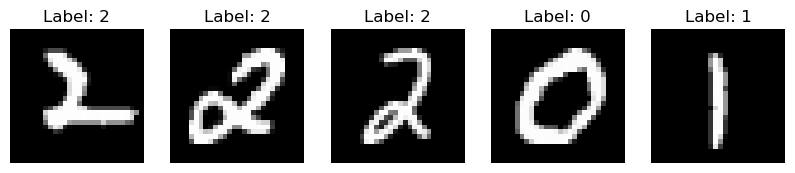

In [65]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for idx in range(5):
    img_tensor = images[idx]
    label = labels[idx].item()

    img_np = img_tensor.squeeze().numpy()

    axes[idx].imshow(img_np, cmap='gray')
    axes[idx].set_title(f"Label: {label}")
    axes[idx].axis("off")
plt.show()

In [66]:
class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.model(x)
        return x

In [67]:
model = BaseModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
num_epochs = 100
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    model.train()
    current_loss = 0.0
    for img_tensor, label in trainloader:
        output = model(img_tensor)
        
        optimizer.zero_grad()
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
    avg_train_loss = current_loss / len(trainloader)
    train_loss.append(avg_train_loss)
   
    model.eval()
    current_loss = 0.0
    with torch.no_grad():
        for img_tensor, label in testloader:
            output = model(img_tensor)
            loss = criterion(output, label)
            current_loss += loss.item()
    avg_test_loss = current_loss / len(testloader)
    test_loss.append(avg_test_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Train Loss {avg_train_loss:.3f}; Test Loss {avg_test_loss:.3f}")


Epoch 1: Train Loss 0.296; Test Loss 0.139


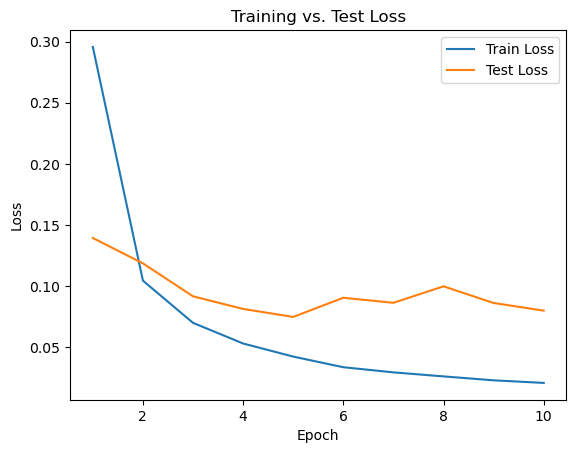

In [70]:
plt.plot(range(1, num_epochs + 1), train_loss, label="Train Loss")
plt.plot(range(1, num_epochs + 1), test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Test Loss")
plt.show()

tensor([5, 8, 8, 4, 4, 8, 4, 4, 7, 7, 1, 4, 2, 3, 5, 1, 8, 7, 2, 0, 2, 5, 3, 7,
        1, 1, 9, 4, 5, 5, 0, 1, 0, 8, 4, 3, 4, 1, 1, 6, 6, 6, 7, 1, 7, 4, 5, 9,
        3, 1, 5, 5, 6, 8, 9, 3, 3, 5, 0, 1, 7, 1, 7, 6])